In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [22]:
# === Query Visualization ===
#
# plot the queries, only in 2D
#
# @query_collection: could be more than 2 dimensions, but only plot the first 2 dimensions
# @domains: the domain of the plot dimensions, shoud be corresponding with the order of plotdim
#
def plot_queries_2d(query_collection, domains):
    
    fig, ax = plt.subplots(1)
    
    plt.xlim(domains[0][0],domains[0][1])
    plt.ylim(domains[1][0],domains[1][1])

    query_size = len(query_collection)
    for i in range(query_size):
        lower1 = query_collection[i][0][0]
        upper1 = query_collection[i][0][1]
        lower2 = query_collection[i][1][0]
        upper2 = query_collection[i][1][1]
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=1)
        ax.add_patch(rect)
    
    plt.show()

# plot_queries_2d(query_collection, domains_)
# plot_queries_2d(training_set, domains_)
# plot_queries_2d(testing_set, domains_)

def plot_queries_2d_distribution_and_random(query_distribution, query_random, domains, path=None):
    fig, ax = plt.subplots(1)
    
    plt.xlim(domains[0][0],domains[0][1])
    plt.ylim(domains[1][0],domains[1][1])

    for i in range(len(query_random)):
        lower1 = query_random[i][0][0]
        upper1 = query_random[i][0][1]
        lower2 = query_random[i][1][0]
        upper2 = query_random[i][1][1]
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='b',linewidth=1)
        ax.add_patch(rect)
    
    for i in range(len(query_distribution)):
        lower1 = query_distribution[i][0][0]
        upper1 = query_distribution[i][0][1]
        lower2 = query_distribution[i][1][0]
        upper2 = query_distribution[i][1][1]
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=1)
        ax.add_patch(rect)
    
    if path != None:
        fig.savefig(path)
        
    plt.show()

In [3]:
def save_query(queryset, path):
    queryset = np.array(queryset)
    queryset_save_version = queryset.reshape(len(queryset),-1)
    np.savetxt(path, queryset_save_version)

def load_query(path):
    query_set = np.genfromtxt(path, delimiter=' ')
    query_set = query_set.reshape(len(query_set),-1,2)
    return query_set

In [5]:
# === Query Generation ===
#
# by default, use Gaussian distribution to generate the synthetic query workload
#
# @cluster_amount: the cluster amount of the query; integer
# @queries_in_each_cluster: the number of queries in each cluster; interger
# @dimensions: the domain of each dimension; numpy object
# @maximum_expected_range: the maximum expected range of each dimension; array object
# @maximum_sigma: the maximum sigma of Gaussian distribution of each dimension; array object
#
# return @temp_queries: array object
#
def generate_query_clustered(cluster_amount, queries_in_each_cluster, dimensions, maximum_expected_range, maximum_sigma, percentage):
    random.seed()
    num_dims = len(dimensions)
    
    queries = []
    for j in range(num_dims):
        queries.append([])
    
    # for each cluster
    for i in range(cluster_amount):
        
        # determin the cluster center on each dimension
        cluster_center = []
        
        # for each dimension
        for j in range(num_dims):
            
            # to assure the distribution do not exceed the border
            dim_range = dimensions[j][1]-dimensions[j][0]
            center1D = random.randrange(dim_range)
            cluster_center.append(center1D)
            
            query_range = random.randrange(maximum_expected_range[j])
            range_lower = center1D - query_range/2
            range_upper = center1D + query_range/2
            
            if range_lower <= dimensions[j][0]:
                range_lower = dimensions[j][0]
            if range_upper >= dimensions[j][1]:
                range_upper = dimensions[j][1]
            
            sigma = random.randrange(maximum_sigma[j])
            
            # for each query
            for k in range(queries_in_each_cluster):
                
                # determine if to let this query dimension invalid by percentage (i.e., cover the entire domain)
                possibility = random.uniform(0, 1)
                if possibility > percentage[j]:
                    lower1D = dimensions[j][0]
                    upper1D = dimensions[j][1]
                    queries[j].append([lower1D, upper1D])
                else:
                    #determin the lower bound
                    lower1D = random.gauss(range_lower, sigma)
                    upper1D = random.gauss(range_upper, sigma)
                    if lower1D <= dimensions[j][0]:
                        lower1D = dimensions[j][0]
                    if lower1D >= dimensions[j][1]:
                        lower1D = dimensions[j][1]
                    if upper1D <= dimensions[j][0]:
                        upper1D = dimensions[j][0]
                    if upper1D >= dimensions[j][1]:
                        upper1D = dimensions[j][1]
                    if lower1D > upper1D:
                        lower1D, upper1D = upper1D, lower1D
                    queries[j].append([lower1D, upper1D])
                
    # transform the query structure
    temp_queries = []
    values = []
    for i in range(len(queries[0])):
        for j in range(num_dims):
            values.append(queries[j][i])
        temp_queries.append(values)
        values=[]
            
    # return queries
    return temp_queries

In [6]:
# # Example of usage (Generate Query)

# #@pysnooper.snoop()
# def query_seperation(query_collection, training_set_percentage = 0.8):
#     np.random.shuffle(query_collection)
#     training_set_size = int(training_set_percentage * len(query_collection))
#     query_collection = np.asarray(query_collection) # as the shuffle make np to array, we need to make it back
#     training_set = query_collection[0:training_set_size,:]
#     testing_set = query_collection[training_set_size:-1,:]
#     return training_set, testing_set

# query_collection = generate_query_clustered(cluster_amount_, queries_each_cluster_, domains_, ranges_, sigmas_, percentage_)

# training_set, testing_set = query_seperation(query_collection, 1-testing_set_percentage)

# # to save, transfer it to 2D first
# training_set_save_version = training_set.reshape(len(training_set),-1)
# testing_set_save_version = testing_set.reshape(len(testing_set),-1)

# np.savetxt('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/query/training.csv', training_set_save_version)
# np.savetxt('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/query/testing.csv', testing_set_save_version)
# # training_set = query_collection
# # testing_set = query_collection

In [7]:
# in this function, we generate query with random queries
def generate_random_query(domain, maximum_range, amount):
    
    total_query = []
    for i in range(amount):
        query = []
        for k in range(len(domain)):
            center = random.randrange(domain[k][0], domain[k][1])
            query_range = random.uniform(0,maximum_range[k])
            range_lower = center - query_range/2
            range_upper = center + query_range/2
            if range_lower <= domain[k][0]:
                range_lower = domain[k][0]
            if range_upper >= domain[k][1]:
                range_upper = domain[k][1]
            query.append([range_lower, range_upper])
        total_query.append(query)
    return total_query
    
# generate query with gaussian distribution
def generate_distribution_query(domain, cluster_center_amount, maximum_range, maximum_sigma_percentage, amount):
    
    # first, generate cluster centers
    centers = []
    for i in range(cluster_center_amount):
        center = []
        for k in range(len(domain)):
            ck = random.randrange(domain[k][0], domain[k][1])
            center.append(ck)
        centers.append(center)
    
    # second, generate expected range for each dimension for each center
    centers_ranges = []
    for i in range(cluster_center_amount):
        ranges = []
        for k in range(len(domain)):
            ran = random.randrange(maximum_range[k])
            ranges.append(ran)
        centers_ranges.append(ranges)
    
    # third, generate sigma for each dimension for each center
    centers_sigmas = []
    for i in range(cluster_center_amount):
        sigmas = []
        for k in range(len(domain)):
            sigma = random.uniform(0, maximum_range[k]*maximum_sigma_percentage[k])
            sigmas.append(sigma)
        centers_sigmas.append(sigmas)
    
    # fourth, generate queries
    total_query = []
    for i in range(amount):
        # choose a center
        center_index = random.randint(0, cluster_center_amount-1) # this is inclusive
        query = []
        for k in range(len(domain)):
            center = centers[center_index]
            query_range = centers_ranges[center_index][k]
            range_lower = center[k] - query_range/2
            range_upper = center[k] + query_range/2
            
            range_lower = random.gauss(range_lower, centers_sigmas[center_index][k])
            range_upper = random.gauss(range_upper, centers_sigmas[center_index][k])
            
            if range_lower <= domain[k][0]:
                range_lower = domain[k][0]
            if range_upper >= domain[k][1]:
                range_upper = domain[k][1]
            
            if range_lower > range_upper:
                range_lower, range_upper =  range_upper, range_lower
                
            query.append([range_lower, range_upper])
        total_query.append(query)
        
    return total_query
    
def generate_query_with_random(total_query_amount, random_percentage, domain, maximum_range_random, 
                               cluster_amount, maximum_range_dis, sigmas_percentage, random_shift = False, return_seperate = False):
    random.seed()
    
    num_query_distribution = int(total_query_amount * (1 - random_percentage))
    num_query_random = total_query_amount - num_query_distribution
    
    random_query = generate_random_query(domain, maximum_range_random, num_query_random)
    distribution_query = generate_distribution_query(domain, cluster_amount, maximum_range_dis, sigmas_percentage, num_query_distribution)
    
    total_query = random_query + distribution_query
    if random_shift:
        random.shuffle(total_query) # will replace the original
        
    # return random_query, distribution_query
    if return_seperate:
        return [random_query, distribution_query, total_query]
    return total_query

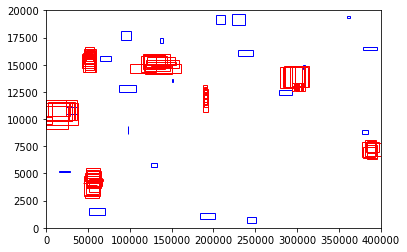

In [16]:
# domain_ = [[1,4.00000000e+05],[1,2.00000000e+04]]
# maximum_random_range_ = [20000, 1000]
# maximum_range_dis_ = [40000, 2000]
# sigmas_percentage_ = [0.3,0.3]
# mixed_queris = generate_query_with_random(100, 0.2, domain_, maximum_random_range_, 
#                                           8, maximum_range_dis_, sigmas_percentage_, False, True)

# plot_queries_2d_distribution_and_random(mixed_queris[1], mixed_queris[0], domain_)

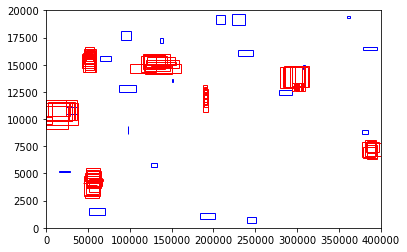

In [23]:
# random_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_random.csv')
# distribution_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_distribution.csv')
# savepath = 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_fusion.pdf'
# plot_queries_2d_distribution_and_random(distribution_query, random_query, domain_, savepath)

In [18]:
# save_query(mixed_queris[1], 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_distribution.csv')
# save_query(mixed_queris[0], 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_random.csv')

In [18]:
# # = = = Unit Test = = =
# tiny_domains = [[0,10],[0,10]]
# random_queries = generate_random_query(tiny_domains, [2,2], 100)
# # print(random_queries)
# # plot_queries_2d(random_queries, tiny_domains)

In [19]:
# # = = = Unit Test = = =
# tiny_domains = [[0,10],[0,10]]
# distribution_queries = generate_distribution_query(tiny_domains, 10, [3,3], [0.2,0.2], 100)
# # print(distribution_queries)
# # plot_queries_2d(distribution_queries, tiny_domains)

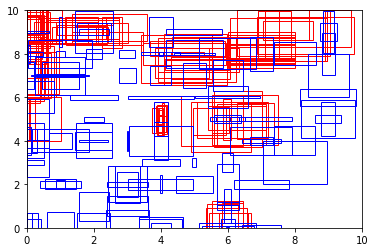

In [114]:
# plot_queries_2d_distribution_and_random(distribution_queries, random_queries, tiny_domains)

In [20]:
# # = = = Unit Test = = =
# tiny_domains = [[0,10],[0,10]]
# fusion_queries = generate_query_with_random(50, 0.5, tiny_domains, [2,2], 3, [3,3], [0.2,0.2])
# print(fusion_queries)
# plot_queries_2d(fusion_queries, tiny_domains)

In [28]:
def generate_query_pattern_for_one_user(domain, maximum_range, maximum_sigma_percentage):
    random.seed()
    # first, generate cluster center
    center = []
    for k in range(len(domain)):
        ck = random.randrange(domain[k][0], domain[k][1])
        center.append(ck)
        
    # second, generate expected range for each dimension
    ranges = []
    for k in range(len(domain)):
        ran = random.randrange(maximum_range[k])
        ranges.append(ran)
        
    # third, generate sigma for each dimension
    sigmas = []
    for k in range(len(domain)):
        sigma = random.uniform(0, maximum_range[k]*maximum_sigma_percentage[k])
        sigmas.append(sigma)
        
    return (center, ranges, sigmas)

# generate 1 query
def generate_distribution_query_for_one_user(domain, center, ranges, sigmas):
    random.seed()
    query = []
    for k in range(len(domain)):
        range_lower = center[k] - ranges[k]/2
        range_upper = center[k] + ranges[k]/2

        range_lower = random.gauss(range_lower, sigmas[k])
        range_upper = random.gauss(range_upper, sigmas[k])

        if range_lower <= domain[k][0]:
            range_lower = domain[k][0]
        if range_upper >= domain[k][1]:
            range_upper = domain[k][1]
        if range_lower > range_upper:
            range_lower, range_upper =  range_upper, range_lower
        query.append([range_lower, range_upper])
    return query

def generate_one_random_query(domain, maximum_range):
    random.seed()
    query = []
    for k in range(len(domain)):
        center = random.randrange(domain[k][0], domain[k][1])
        query_range = random.uniform(0,maximum_range[k])
        range_lower = center - query_range/2
        range_upper = center + query_range/2
        if range_lower <= domain[k][0]:
            range_lower = domain[k][0]
        if range_upper >= domain[k][1]:
            range_upper = domain[k][1]
        if range_lower > range_upper:
            range_lower, range_upper =  range_upper, range_lower
        query.append([range_lower, range_upper])
        
    return query

# this should generate query with timestamp!
# including distribution shift and random query!
def continous_query_generation(total_query_amount, initial_users, domain, maximum_range, maximum_sigma_percentage, maximum_range_random, 
                              sleep_prob_threshold, random_prob_threshold, new_user_threshold, user_remove_threshold,
                               active_user_threshold):
    random.seed()
    
    # user_pattern_dict
    user_pattern_dict = {}
    active_user_dict = {}
    
    # generate initial user pattern
    for i in range(initial_users): 
        users = [i for i in range(initial_users)]
        user_pattern = generate_query_pattern_for_one_user(domain, maximum_range, maximum_sigma_percentage)
        user_pattern_dict.update({i:user_pattern})
        
        active_user_prob = random.uniform(0,1)
        if active_user_prob < active_user_threshold:
            active_user_dict.update({i:True})
        else:
            active_user_dict.update({i:False})
    
    current_user_index = initial_users-1
    timestamp = 0
    generated_queries = 0
    total_queries = []
    total_queries_with_features = []

    while generated_queries < total_query_amount:
        timestamp += 1
        is_random = False
        user_id = -1 # indicate random query
        
        # skip this round
        sleep_prob = random.uniform(0,1)
        if sleep_prob < sleep_prob_threshold:
            continue
        
        new_query = []
        # consider if generate random query
        random_prob = random.uniform(0,1)
        if random_prob < random_prob_threshold:
            new_query = generate_one_random_query(domain, maximum_range_random)
            is_random = True
        else:
            # generate distribution query
            new_user_prob = random.uniform(0,1)
            if new_user_prob < new_user_threshold:
                # create new user
                current_user_index += 1
                user_id = current_user_index
                users.append(current_user_index)
                new_user_pattern = generate_query_pattern_for_one_user(domain, maximum_range, maximum_sigma_percentage)
                user_pattern_dict.update({current_user_index:new_user_pattern})
                new_query = generate_distribution_query_for_one_user(domain, new_user_pattern[0], new_user_pattern[1], new_user_pattern[2])
                active_user_prob = random.uniform(0,1)
                if active_user_prob < active_user_threshold:
                    active_user_dict.update({current_user_index:True})
                else:
                    active_user_dict.update({current_user_index:False})
            else:
                user_index_index = random.randrange(0, len(users)-1)
                user_index = users[user_index_index]
                user_id = user_index
                user_pattern = user_pattern_dict[user_index]
                new_query = generate_distribution_query_for_one_user(domain, user_pattern[0], user_pattern[1], user_pattern[2])
    
        generated_queries += 1
        total_queries.append(new_query)
        total_queries_with_features.append([new_query, is_random, user_id, timestamp])
        
        # consider remove the oldest user
        for i in reversed(range(int(len(users)/5))):
            user_remove_prob = random.uniform(0,1)
            if user_remove_prob < user_remove_threshold and active_user_dict[users[i]] == False:
                # remove the last user
                user_index = users[i]
                del user_pattern_dict[user_index]
                del users[i]
        
    return total_queries, total_queries_with_features, users

In [22]:
# # = = = Unit Test = = =
# tiny_domains = [[0,10],[0,10]]
# continous_fusion_queries, continous_fusion_queries_features, users = continous_query_generation(
#     200, 10, tiny_domains, [4,4], [0.1,0.1], [2,2], 0.4, 0.2, 0.1, 0.1, 0.1)
# print(continous_fusion_queries)

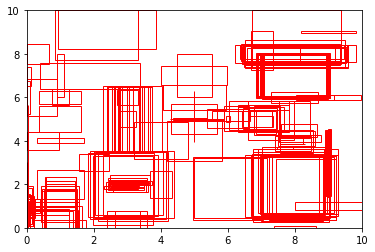

In [58]:
# plot_queries_2d(continous_fusion_queries, tiny_domains)

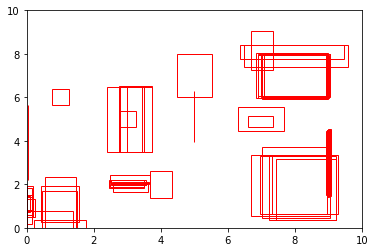

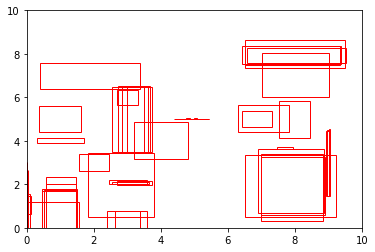

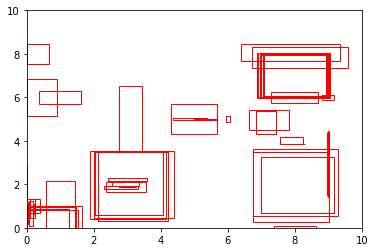

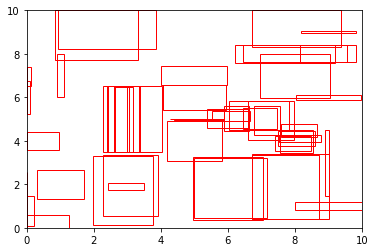

In [59]:
# plot_queries_2d(continous_fusion_queries[0:55], tiny_domains)
# plot_queries_2d(continous_fusion_queries[50:100], tiny_domains)
# plot_queries_2d(continous_fusion_queries[100:150], tiny_domains)
# plot_queries_2d(continous_fusion_queries[150:200], tiny_domains)

In [29]:
# domain = [[1,4.00000000e+05],[1,2.00000000e+04]] # second and third dim
# continous_fusion_queries, continous_fusion_queries_features, users = continous_query_generation(
#     200, 5, domain, [40000, 2000], [0.1,0.1], [10000, 500], 0.4, 0.2, 0.1, 0.1, 0.1)

In [30]:
# save_query(continous_fusion_queries, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/continous_fusion.csv')

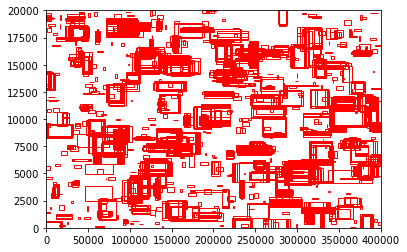

In [31]:
# plot_queries_2d(continous_fusion_queries, domain)

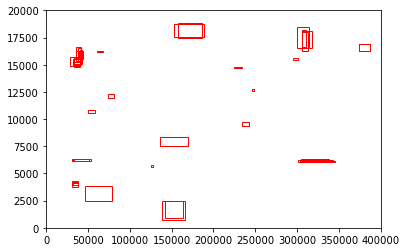

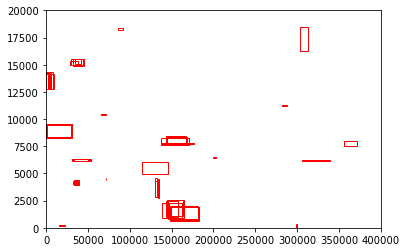

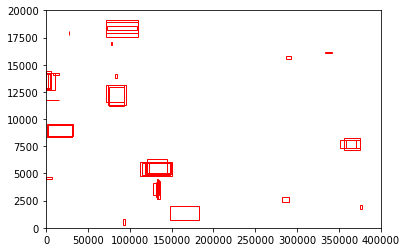

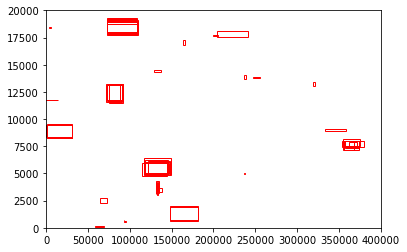

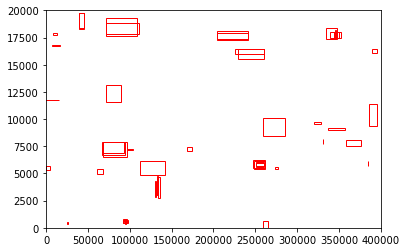

In [32]:
# step = 50
# for i in range (5):
#     plot_queries_2d(continous_fusion_queries[i*step:(i+1)*step], domain)

In [5]:
# def lower_upper_check(queryset):
#     for i in range(len(queryset)):
#         if queryset[i][0][0] > queryset[i][0][1]:
#             queryset[i][0][0], queryset[i][0][1] = queryset[i][0][1], queryset[i][0][0]
#         if queryset[i][1][0] > queryset[i][1][1]:
#             queryset[i][1][0], queryset[i][1][1] = queryset[i][1][1], queryset[i][1][0]

In [6]:
# random_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/random.csv')
# distribution_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/distribution.csv')
# fusion_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/fusion.csv')
# training_set = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/training.csv')
# testing_set = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/testing.csv')

# lower_upper_check(random_query)
# lower_upper_check(distribution_query)
# lower_upper_check(fusion_query)
# lower_upper_check(training_set)
# lower_upper_check(testing_set)

# save_query(random_query, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/random.csv')
# save_query(distribution_query, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/distribution.csv')
# save_query(fusion_query, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/fusion.csv')
# save_query(training_set, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/training.csv')
# save_query(testing_set, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/testing.csv')

In [7]:
# random_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_random.csv')
# distribution_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_distribution.csv')

# lower_upper_check(random_query)
# lower_upper_check(distribution_query)